Parsing html of suumo (odawara rental)

In [ ]:
from bs4 import BeautifulSoup as bs
import requests


url = "https://suumo.jp/jj/chintai/ichiran/FR301FC001/?ar=030&bs=040&ta=13&sc=13121&sc=13123&cb=0.0&ct=9999999&mb=0&mt=9999999&et=9999999&cn=9999999&shkr1=03&shkr2=03&shkr3=03&shkr4=03&sngz=&po1=25&pc=50"

html_content = requests.get(url).text

soup = bs(html_content, 'html.parser')

# Find all parent elements with class 'cassetteitem_price cassetteitem_price--rent'
parent_elements = soup.find_all('span', class_='cassetteitem_price cassetteitem_price--rent')

# Extract child elements with the specific class within the parent
prices = []
for parent in parent_elements:
    price = parent.find('span', class_='cassetteitem_other-emphasis ui-text--bold')
    if price:
        price = float(price.text.replace("万円", "")) * 10000
        prices.append(price)


Data summary

In [56]:
print("Listing count: ", len(prices))
print("Average price: ", int(sum(prices) / len(prices)), "円")


Listing count:  140
Average price:  97253 円


Data processing

In [57]:
frequency = {}

for price in prices:
    price = str(round(price, -4))
    frequency[price] = frequency.get(price, 0) + 1

Data Visualization

<BarContainer object of 13 artists>

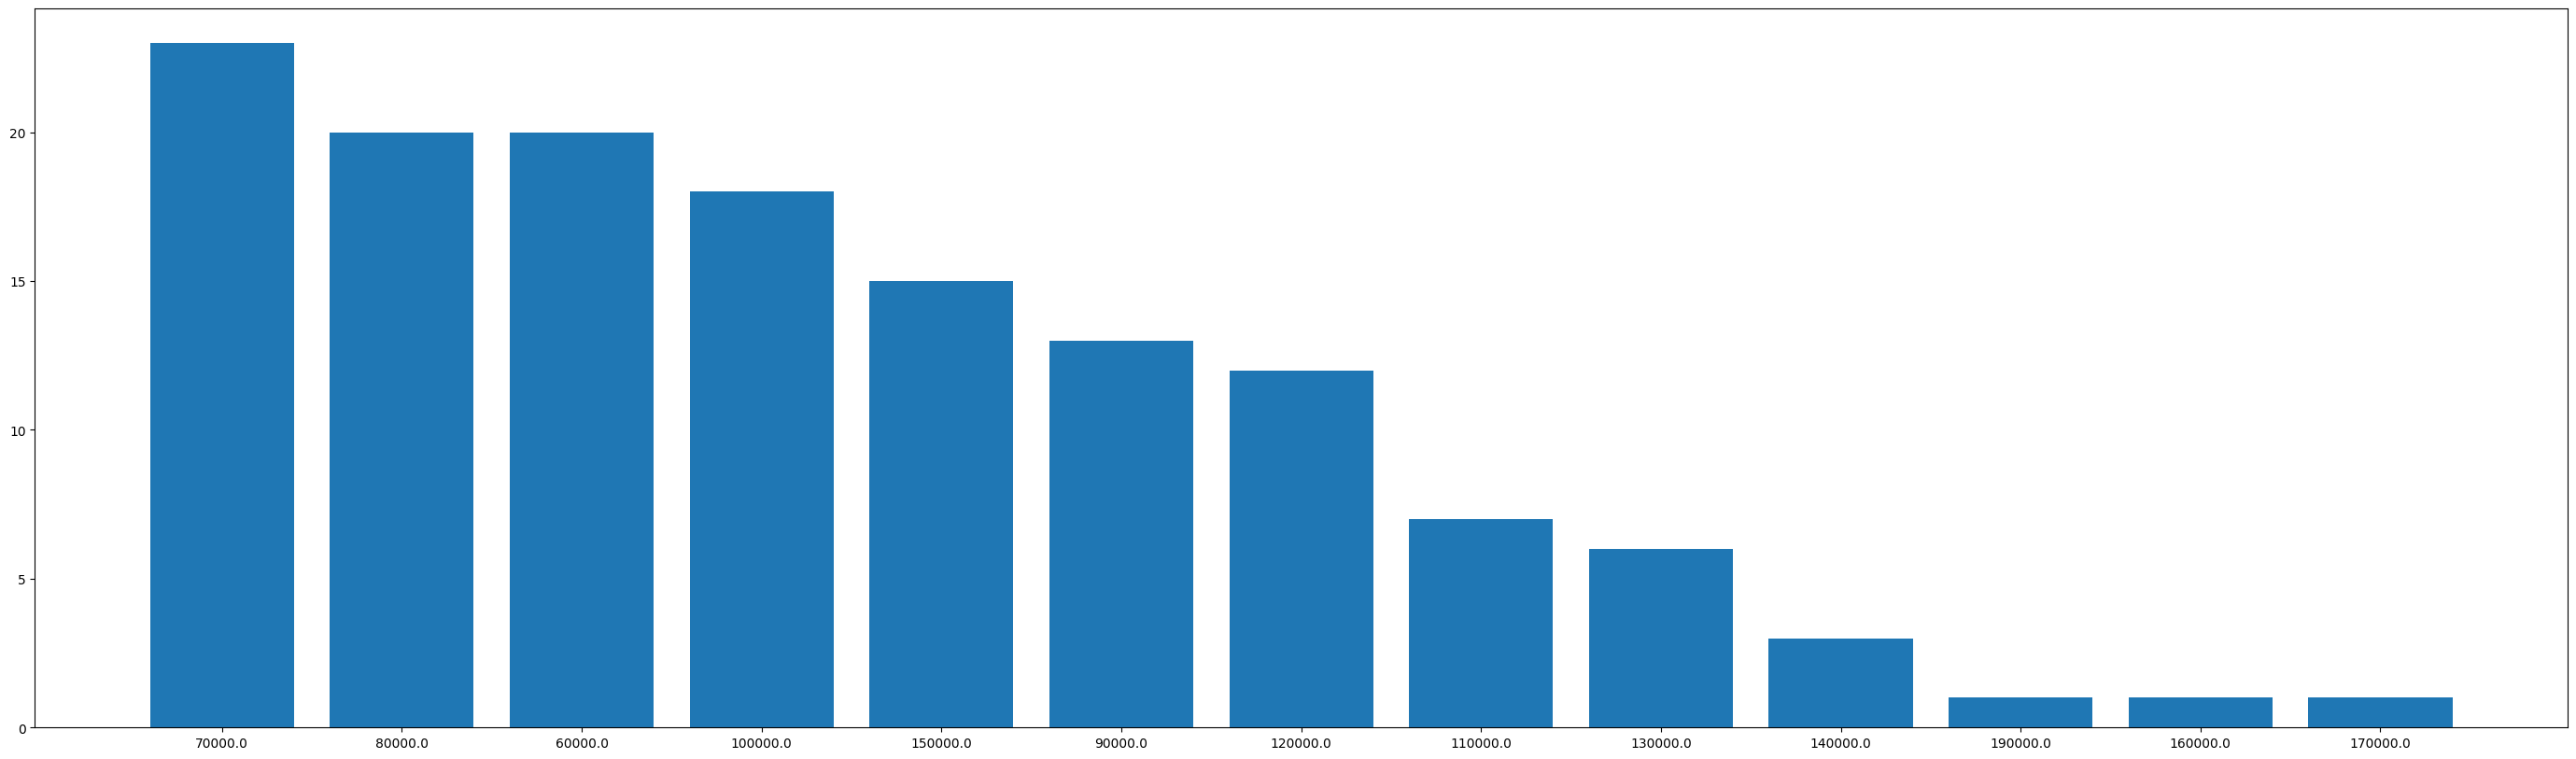

In [58]:
import matplotlib.pyplot as plt

frequency = dict(sorted(frequency.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(35, 10))
plt.bar(frequency.keys(), frequency.values())